### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
import analysis_functions

# Apply better style
analysis_functions.apply_heatmap_style()


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "oct_xing_scan_end_of_levelling_tune1_corrected"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0017/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_oct_b1 i_oct_b2 crossing_angle                      
lhcb1 -600.0   -600.0   150.0               base_collider   
                        160.0               base_collider   
                        170.0               base_collider   
                        180.0               base_collider   
                        190.0               base_collider   
...                                                   ...   
       0.0      0.0     230.0               base_collider   
                        240.0               base_collider   
                        250.0               base_collider   
                        260.0               base_collider   
                        270.0               base_collider   

                                        normalized amplitude in xy-plane  \
beam  i_oct_b1 i_oct_b2 crossing_angle                                     
lhcb1 -600.0   -600.0   150.0                                      4.000   
                        160.0                                      4.000   
                        170.0                                      4.000   
                        180.0                                      4.406   
                        190.0                                      4.562   
...                                                                  ...   
       0.0      0.0     230.0                                      5.406   
                        240.0                                      6.094   
                        250.0                                      6.188   
                        260.0                                      6.625   
                        270.0                                      6.156   

                                            qx      qy   dqx   dqy  \
beam  i_oct_b1 i_oct_b2 crossing_angle                               
lhcb1 -600.0   -600.0   150.0           62.313  60.317  15.0  15.0   
                        160.0           62.313  60.317  15.0  15.0   
                        170.0           62.313  60.317  15.0  15.0   
                        180.0           62.313  60.317  15.0  15.0   
                        190.0           62.313  60.317  15.0  15.0   
...                                        ...     ...   ...   ...   
       0.0      0.0     230.0           62.313  60.317  15.0  15.0   
                        240.0           62.313  60.317  15.0  15.0   
                        250.0           62.313  60.317  15.0  15.0   
                        260.0           62.313  60.317  15.0  15.0   
                        270.0           62.313  60.317  15.0  15.0   

                                        i_bunch_b1  i_bunch_b2  i_oct_b1  \
beam  i_oct_b1 i_oct_b2 crossing_angle                                     
lhcb1 -600.0   -600.0   150.0                150.0       147.0    -600.0   
                        160.0                150.0       147.0    -600.0   
                        170.0                150.0       147.0    -600.0   
                        180.0                150.0       147.0    -600.0   
                        190.0                150.0       147.0    -600.0   
...                                            ...         ...       ...   
       0.0      0.0     230.0                150.0       147.0       0.0   
                        240.0                150.0       147.0       0.0   
                        250.0                150.0       147.0       0.0   
                        260.0                150.0       147.0       0.0   
                        270.0                150.0       147.0       0.0   

                                        i_oct_b2  num_particles_per_bunch  \
beam  i_oct_b1 i_oct_b2 crossing_angle                                      
lhcb1 -600.0   -600.0   150.0             -600.0             1.200000e+11   
                        160.0             -600.0             1.200000e+11   
                        170.0             -600.0

In [3]:
# Reshape for plotting
df_to_plot = df.pivot(index="i_oct_b1", columns="crossing_angle", values="normalized amplitude in xy-plane")
df_to_plot

crossing_angle,150.0,160.0,170.0,180.0,190.0,200.0,210.0,220.0,230.0,240.0,250.0,260.0,270.0
i_oct_b1,,,,,,,,,,,,,
-600.0,4.0,4.0,4.000,4.406,4.562,4.688,4.844,4.906,4.844,5.281,5.188,5.250,5.219
-550.0,4.0,4.0,4.031,4.219,4.500,4.656,4.969,5.125,4.969,4.531,5.094,5.375,5.438
-500.0,4.0,4.0,4.062,4.438,4.406,4.531,4.781,4.844,4.906,5.219,5.219,5.156,5.469
-450.0,4.0,4.0,4.062,4.312,4.594,4.688,4.875,5.031,5.062,5.188,4.969,5.031,5.125
-400.0,4.0,4.0,4.062,4.219,4.406,4.844,4.906,4.719,5.156,5.312,5.531,5.188,4.938
-350.0,4.0,4.0,4.031,4.219,4.500,4.750,4.844,4.812,5.125,5.156,5.344,5.406,5.219
-300.0,4.0,4.0,4.000,4.250,4.375,4.844,4.750,4.906,4.812,5.094,5.156,5.469,5.188
-250.0,4.0,4.0,4.000,4.188,4.562,4.750,4.750,4.719,5.094,5.188,5.062,5.062,4.938
-200.0,4.0,4.0,4.031,4.375,4.562,4.875,5.000,5.250,5.031,4.969,5.219,5.531,5.438


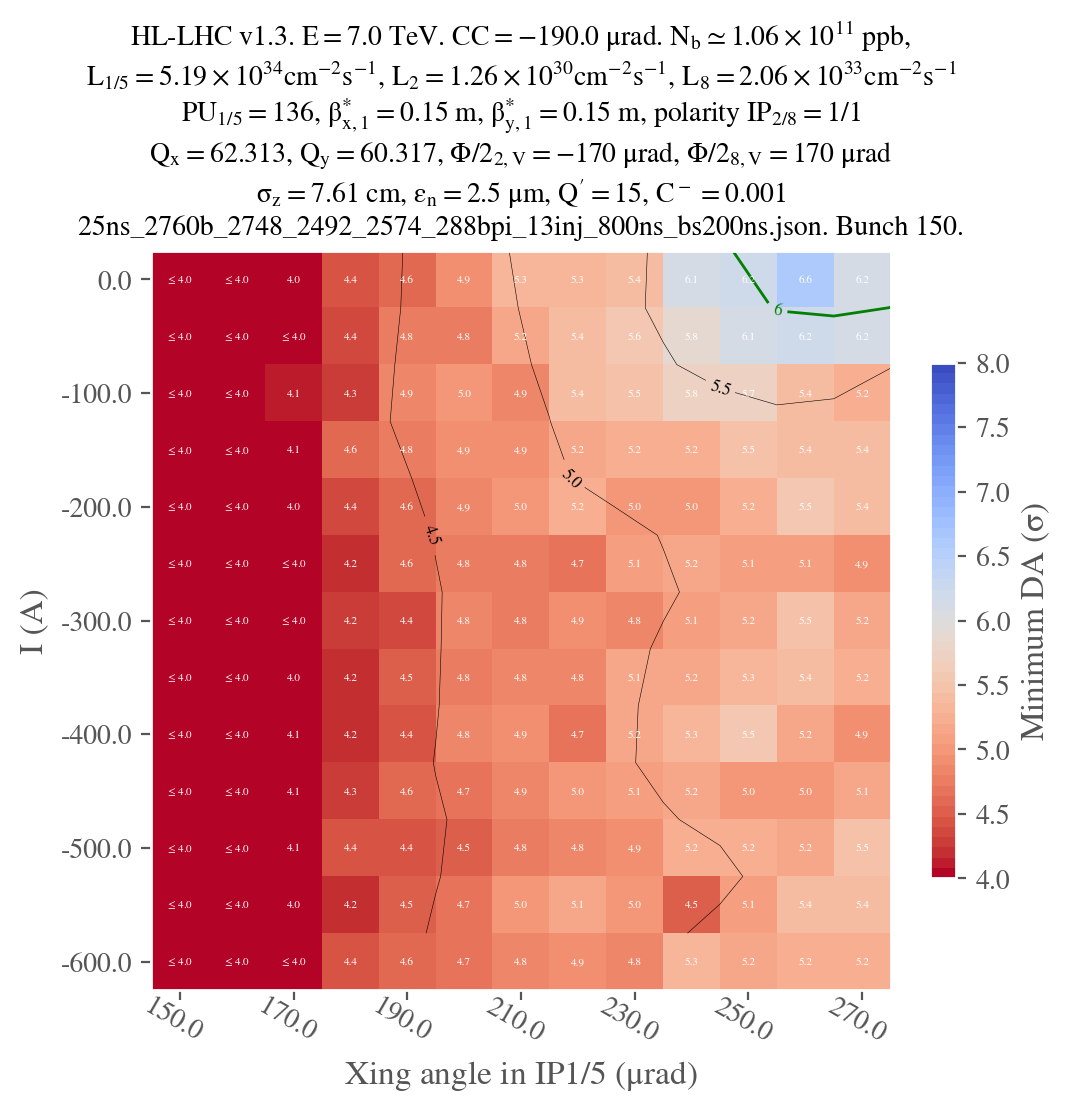

In [4]:
#l_oct = np.linspace(-300,300,25)
#df_to_plot.columns = [str(oct) for oct in l_oct]

# replace nan in df by 10
#df_to_plot = df_to_plot.fillna(10)


# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]

xlabel = r"Xing angle in IP1/5 ($\mu$rad)"
ylabel = r"I (A)" 
analysis_functions.plot_heatmap(
    df_to_plot,
    f'{STUDY_NAME}_{COLLIDER}',
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.15,
    bety=0.15,
    symmetric=False,
    mask_lower_triangle=False,
    xlabel=xlabel,
    ylabel=ylabel,
    plot_diagonal_lines=False,
    xaxis_ticks_on_top=False,
    display_intensity=False,
    green_contour=6.,
    CC = True,
    vmin=4.,
    vmax=8.0,
    extended_diagonal=False,
    Nb=True,
    display_xing = False,
    display_tune = True,
    #title="opt_collapse_1100_1500_oct_scan",
)
